In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(7,5)
plt.rcParams['figure.dpi']=100

import utils

In [2]:
salary = 60
# assume salary of that much
age_now = 35  
age_ret = 66 
# retirement age

# we assume salary increase 4% 
salary_inc = 0.04

In [3]:
ann_rate = utils.annuity_rate()
# this is the rate used ot convert DC -> DB (ie. cash into annuity)

def get_ann_value(db, dc, lump):
    """ 
    Return the value of everything as an annuity
    """
    # we take lump sum + dc and convert into annuity added to DB
    return (dc + lump) * ann_rate + db

In [4]:
# Let's check the value of the pension as a function of inflation 

inflation = np.linspace(0.01,0.1,20)
old_values = np.zeros_like(inflation)
new_values = np.zeros_like(inflation)


In [5]:
age_delta= age_ret - age_now
for i, curi in enumerate(inflation):
    # We assume stock market is doing inflation + 5%
    stock_market = 0.05 + curi
    kw = dict(salary_inc=salary_inc, inflation=curi, stock_market=stock_market)
    old_values[i] = get_ann_value(
        *utils.future_value(salary, age_delta,
                            uss_options =utils.USS_OLD_opts, **kw))
    new_values[i]=get_ann_value(
        *utils.future_value(salary, age_delta, 
                                     uss_options=utils.USS_NEW_opts, **kw))


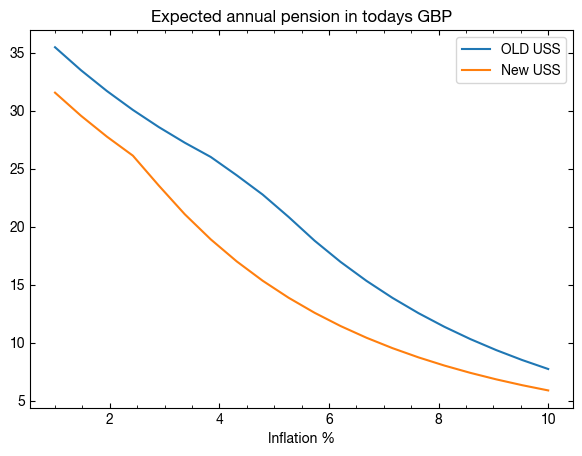

In [6]:
plt.plot(inflation*100,old_values, label='OLD USS')
plt.plot(inflation*100,new_values, label='New USS')
plt.xlabel('Inflation %')
plt.title('Expected annual pension in todays GBP')
plt.legend()